In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

C:\Users\tegar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tegar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\tegar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
data=pd.read_csv('BTC-USD.csv')
data = data.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})

In [4]:
data.head()

,date,open,high,low,close,adj_close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
data.tail()

,date,open,high,low,close,adj_close,volume
3301,2023-10-01,26967.396484,28047.238281,26965.093750,27983.750000,27983.750000,9503917434
3302,2023-10-02,27976.798828,28494.458984,27347.787109,27530.785156,27530.785156,19793041322
3303,2023-10-03,27508.251953,27667.191406,27216.001953,27429.978516,27429.978516,11407814187
3304,2023-10-04,27429.074219,27826.658203,27248.105469,27799.394531,27799.394531,11143355314
3305,2023-10-05,27798.646484,28091.861328,27375.601563,27415.912109,27415.912109,11877253670


In [6]:
data.shape

(3306, 7)

In [7]:
data.describe()

,open,high,low,close,adj_close,volume
count,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3.306000e+03
mean,13991.734452,14323.476125,13628.744500,13998.567244,13998.567244,1.646868e+10
std,15968.798330,16359.688720,15522.842576,15965.674415,15965.674415,1.928351e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,794.346252,824.041748,788.599502,801.865479,801.865479,1.382260e+08
50%,8001.786865,8200.515625,7803.224853,8013.798828,8013.798828,1.069416e+10
75%,21857.928223,22570.074219,21436.204101,22090.680664,22090.680664,2.712008e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [8]:
data.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [9]:
data['date'] = pd.to_datetime(data.date)
data.head()

,date,open,high,low,close,adj_close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
correlation=data.corr()

In [11]:
print(correlation)

               open      high       low     close  adj_close    volume
open       1.000000  0.999499  0.999100  0.998803   0.998803  0.691823
high       0.999499  1.000000  0.998961  0.999459   0.999459  0.696727
low        0.999100  0.998961  1.000000  0.999362   0.999362  0.682558
close      0.998803  0.999459  0.999362  1.000000   1.000000  0.690544
adj_close  0.998803  0.999459  0.999362  1.000000   1.000000  0.690544
volume     0.691823  0.696727  0.682558  0.690544   0.690544  1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
X = data[
    [
        'high',
        'low',
        'open',
        'volume']
]
Y = data['close']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [14]:
import shap
shap.initjs()

In [15]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

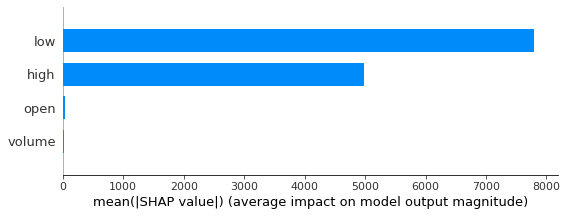

In [16]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [17]:
def abs_shap(df_shap, df):
    # membuat copy dari data agar data tidak berantakan
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # menentukan korelasi untuk plot dengan warna yg berbeda
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i], df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list), pd.Series(corr_list)], axis=1).fillna(0)
    # membuat dataframe. kolom 1 adalah fitur dan kolom 2 adalah korelasi
    corr_df.columns  = ['Variable', 'Corr']
    corr_df['Sign'] = np.where(corr_df['Corr'] > 0, 'red', 'blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k = pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable', 'SHAP_abs']
    k2 = k.merge(corr_df, left_on = 'Variable', right_on='Variable', how='inner')
    k2 = k2.sort_values(by='SHAP_abs', ascending=True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable', y='SHAP_abs', color=colorlist, figsize=(5, 6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

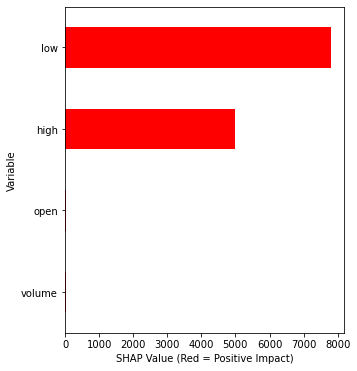

In [18]:
abs_shap(shap_values, X_train) 

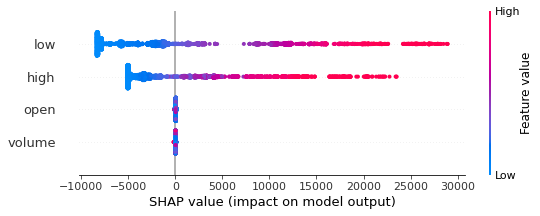

In [19]:
shap.summary_plot(shap_values, X_train)

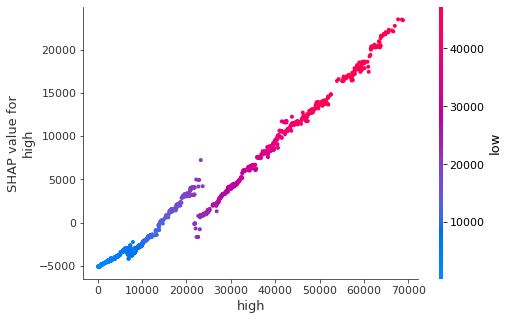

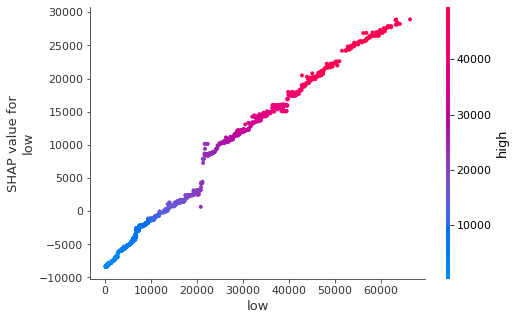

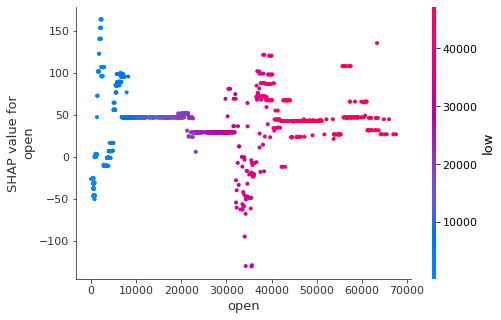

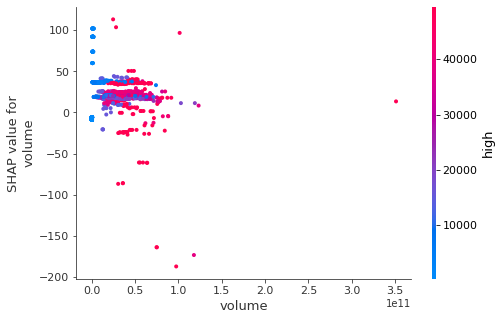

In [20]:
shap.dependence_plot("high", shap_values, X_train)
shap.dependence_plot("low", shap_values, X_train)
shap.dependence_plot("open", shap_values, X_train)
shap.dependence_plot("volume", shap_values, X_train)

In [211]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

In [232]:
random_picks = np.arange(1,330,32)
S = X_output.iloc[random_picks]
S

,high,low,open,volume,predict
347,232.067993,226.246994,229.895004,19412600,264.70
2519,46637.988281,44705.554688,46280.847656,33546019517,46069.81
1275,8428.349609,7783.049805,8290.759766,6834429952,8218.00
1460,6544.330078,6460.100098,6536.680176,3273730000,6566.84
2112,9237.573242,9041.875977,9140.029297,16460547078,9238.34
2673,43001.156250,41407.753906,41819.507813,26327648900,42429.26
2661,47879.964844,46060.312500,46490.605469,26686491018,46724.51
2491,33327.101563,32261.419922,33125.468750,19120856669,33153.31
1576,4064.066650,3659.174561,4034.411377,6874143796,3935.17
2652,49300.917969,46698.773438,46886.078125,27055803928,48202.62


In [235]:
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

In [236]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [239]:
shap_plot(0)

In [241]:
import shap

# Train a tree-based model (Random Forest Regressor in this case)
randomforest_model = RandomForestRegressor()
randomforest_model.fit(X_train, Y_train)

# Create a TreeExplainer object with the trained model
explainer = shap.TreeExplainer(randomforest_model)

# Compute SHAP values for the specific instance (index 2666 in this case)
index_to_explain = 2666
instance_to_explain = X.iloc[[index_to_explain]]
shap_values = explainer.shap_values(instance_to_explain)

# Visualize the SHAP values for the specific instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, instance_to_explain)
